# **Objective: Analyze auto insurance claims data to assess risk, detect fraud, and optimize profitability.**

By: Denzel Chike

Key Questions to Answer:
1. What factors increase the likelihood of a claim?
2. Can we identify fraudulent claims?
3. How do claim amounts vary by customer segments?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest



##Load Dataset

In [ ]:
df = pd.read_csv('/content/AutoInsuranceClaims2024.csv')
print(df.head())

  Customer       State  Customer Lifetime Value Response  Coverage  \
0  QC35222  California                  3622.69       No     Basic   
1  AE98193  Washington                 10610.21       No     Basic   
2  TM23514      Oregon                 13868.02       No  Extended   
3  WB38524  California                  4008.95       No     Basic   
4  QZ42725  Washington                  3119.69       No     Basic   

   Coverage Index             Education  Education Index Effective To Date  \
0               0              Bachelor                2          1/1/2024   
1               0  High School or Below                0          1/1/2024   
2               1               College                1          1/1/2024   
3               0  High School or Below                0          1/1/2024   
4               0              Bachelor                2          1/1/2024   

  Employment Status  ...        Policy Policy Index  Renew Offer Type  \
0          Employed  ...  Corporate L

##Dataset Info

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Coverage Index                 9134 non-null   int64  
 6   Education                      9134 non-null   object 
 7   Education Index                9134 non-null   int64  
 8   Effective To Date              9134 non-null   object 
 9   Employment Status              9134 non-null   object 
 10  Employment Status Index        9134 non-null   int64  
 11  Gender                         9134 non-null   object 
 12  Income                         9134 non-null   i

##Number of Columns and Rows

In [ ]:
df.shape

(9134, 34)

##Checking for Missing Values

In [ ]:
print(df.isnull().sum())

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Coverage Index                   0
Education                        0
Education Index                  0
Effective To Date                0
Employment Status                0
Employment Status Index          0
Gender                           0
Income                           0
Location                         0
Location Index                   0
Marital Status                   0
Marital Status Index             0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy Type Index                0
Policy                           0
Policy Index                     0
Renew Offer Type                 0
Sales Channel                    0
Sales Channel Index 

##Summary Statistics

In [ ]:
print(df.describe())

       Customer Lifetime Value  Coverage Index  Education Index  \
count              9134.000000     9134.000000      9134.000000   
mean              10806.669619        0.480622         1.288373   
std                9275.806257        0.655817         1.079984   
min                2562.310000        0.000000         0.000000   
25%                5392.237500        0.000000         0.000000   
50%                7803.250000        0.000000         1.000000   
75%               12098.922500        1.000000         2.000000   
max              112489.260000        2.000000         4.000000   

       Employment Status Index         Income  Location Index  \
count              9134.000000    9134.000000     9134.000000   
mean                  0.988395   50837.478432        0.979089   
std                   0.907454   41012.876153        0.605732   
min                   0.000000       0.000000        0.000000   
25%                   0.000000       0.000000        1.000000   
50%   

##Check for Duplicates

In [ ]:
print(df.duplicated().sum())

0


## Data Cleaning &  Preprocessing

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

##Question 1. What factors increase the likelihood of a claim?

In [ ]:


# Prepare target variable assuming 'Response' column indicates if a claim occurred,
# mapping 'Yes' to 1 and 'No' to 0 (adjust if needed)
df['Response_binary'] = df['Response'].map({'Yes': 1, 'No': 0})

# Drop non-predictive columns (e.g. original Response, Customer ID) if present
X = df.drop(['Response', 'Response_binary', 'Customer'], axis=1, errors='ignore')
y = df['Response_binary']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Build and fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

# Extract coefficients and create a feature importance dataframe
coeffs = model.coef_[0]
features = X_encoded.columns
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coeffs})
feature_importance['abs_coeff'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('abs_coeff', ascending=False)

print("Features increasing the likelihood of a claim using logistic regression):")
print(feature_importance[['Feature', 'Coefficient']].to_string(index=False))


Features increasing the likelihood of a claim using logistic regression):
                        Feature  Coefficient
      Effective To Date_1/22/11    -0.652307
               Renew Offer Type    -0.607987
     Effective To Date_4/1/2024    -0.588192
              Location_Suburban     0.551681
      Employment Status_Retired     0.466351
             Total Claim Amount    -0.374875
           Monthly Premium Auto     0.268144
    Effective To Date_11/2/2024    -0.256212
                         Income     0.240617
     Effective To Date_4/2/2024    -0.226843
           Sales Channel_Branch    -0.225106
                 Location Index     0.212833
      Sales Channel_Call Center    -0.212005
                 Location_Urban    -0.181065
     Effective To Date_2/2/2024    -0.175930
      Effective To Date_1/26/11     0.167236
      Effective To Date_1/31/11     0.162036
     Effective To Date_9/1/2024    -0.138631
           Marital Status Index     0.136009
               Education_D

##The Top 5 Features with the Highest Coefficients that are Most Influential in Predicting Claim.

In [ ]:
top_5 = feature_importance.head(5)
print ("Top 5 impactful features with highest coefficients:")
print(top_5[['Feature', 'Coefficient']].to_string(index=False))

Top 5 impactful features with highest coefficients:
                   Feature  Coefficient
 Effective To Date_1/22/11    -0.652307
          Renew Offer Type    -0.607987
Effective To Date_4/1/2024    -0.588192
         Location_Suburban     0.551681
 Employment Status_Retired     0.466351


#Conclusion
The positive coefficients show that as the feature increases the claim increases. The negative coefficients show that as the feature increases the claim decreases.

Both large negative and positive coefficents means that theres a increase in the predictor.

##Question 2. Can we identify fradulent claims?

In [ ]:

# Select numeric features for anomaly deetection
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X_numeric = df[numeric_cols].fillna(0)

# Scale the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Input the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X_scaled)


# Marking any Anomalies as potential fraud where 1 = normal and -1 for anomalies
df['potential_fraud'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

#Filtered the rows that equal 1 as potential fraud
fraudulent_rows = df[df['potential_fraud'] == 1]

print('Rows that are flagged as potential fraud:')
print(fraudulent_rows.head(10))

print('Total number of potential fraudulent claims:', len(fraudulent_rows))


Rows that are flagged as potential fraud:
    Customer       State  Customer Lifetime Value Response  Coverage  \
24   EF87528     Arizona                  6259.34      Yes     Basic   
230  NM77390      Nevada                 11066.91       No     Basic   
256  XF89906     Arizona                 78579.62       No  Extended   
322  FG29932  California                 10584.22      Yes  Extended   
330  OZ19432      Nevada                  5904.95       No   Premium   
386  MT27589      Oregon                 10584.22      Yes  Extended   
422  WO81184  California                  6820.72       No     Basic   
594  QK82654  California                 26797.14       No   Premium   
672  FX26050      Oregon                 30661.23       No     Basic   
705  AT26484      Nevada                  5154.93       No   Premium   

     Coverage Index             Education  Education Index Effective To Date  \
24                0               College                1          1/1/2024   
230  

#Conclusion

We selected all numeric columns for anomaly detection. The feature were scaled using Isolation forest with a 1% contamination rate to flag rows that look suspiscious. I labled the rows as -1 as potential fraud and 1 as normal. Then it prints out a subset of records flagged as potential fraud and the total number of cases in csv. The amount of potential fraudlent claims is 92.  


##Question 3. How do claims amounts vary by customer segments?

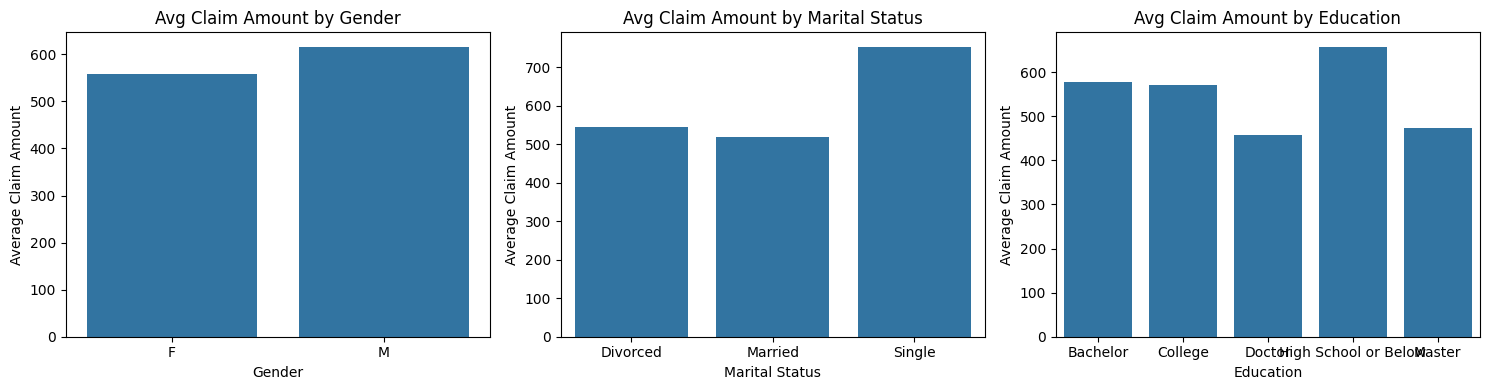

Average Total Claim Amount by Gender
Gender
F    557.356243
M    615.849086
Name: Total Claim Amount, dtype: float64 

Average Total Claim Amount by Marital Status
Marital Status
Divorced    545.001454
Married     519.098048
Single      752.499976
Name: Total Claim Amount, dtype: float64 

Average Total Claim Amount by Education
Education
Bachelor                577.791910
College                 572.147564
Doctor                  456.551988
High School or Below    657.706133
Master                  472.820297
Name: Total Claim Amount, dtype: float64 



In [ ]:
# Sample segmentation: by Gender, Martial Status, and Education
segments = ['Gender', 'Marital Status', 'Education']

# Plot average Total Claim Amount for each segment
fig, axes = plt.subplots(1, len(segments), figsize=(5 * len(segments), 4))

for i, seg in enumerate(segments):
    # Group by the segment and calculate average claim amount
    seg_data = df.groupby(seg)['Total Claim Amount'].mean().reset_index()

    # Create a barplot for each segment
    sns.barplot(x=seg, y='Total Claim Amount', data=seg_data, ax=axes[i])
    axes[i].set_title('Avg Claim Amount by ' + seg)
    axes[i].set_ylabel('Average Claim Amount')
    axes[i].set_xlabel(seg)
    axes[i].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


# Additionally, print the grouped means for reference
for seg in segments:
    print("Average Total Claim Amount by", seg)
    print(df.groupby(seg)['Total Claim Amount'].mean(), "\n")

#Conclusion

This question focuses on customer segments, Gender, Marital Status, and Education. Each segments has an average claim amount and shows a visualization. This helped target patterns for risk management.

#Project Conclusion

This project provided actionable insights. The modeling indicates which features drive claim probabilities and fraud detection and segmentation provides understanding. These findings can help insurance coompanies refine their risk assessments, improve fraud detection, and design customer policies.

#Key Findings

# **Q1.** **The Factors Increasing Claim Likelihood:**

I used logistic regression to identify the factors effective dates, renew offer types, location (Suburban), employment status (Retired), monthly premium auto, and income are among the top contributors to increasing the likelihood of a claim.

# **Q2.** **The Fraud Detection:**

I applied the Isolation Forest algorithm to detect fraud in claims which resulted in finding 92 claims that were flagged as potential fraud cases.

# **Q3.** **The Claims Amounts by Customer Segments:**

**Gender:** I analyzed Males to find that they have a higher average claim amount of 615.85 compared to Females who average 557.36.

**Martial Status:** I analyzed Single customers to find that they have the highest average claim amount of 752.50 while Divorce has 545.00 and Married has 519.10 customers.

**Education:** I analyzed customers with High school or Below education to find that they have the highest average claim amount of 657.71. In contrast, customers with Master's degrees have the lowest average of 472.82.  


#**Insights and Conclusions:**

The logistic regression findings help improve pricing and risk assessment methods.

The fraud detection analysis helps minimize fraudulent claims.

The customer segment analysis suggests that targeted policy designs might be useful to better suit the various demands and risk profiles of different populations.  
